In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

In [3]:
names = ['year', '0-4',	'5-9',	'10-14',	'15-19',	'20-24',	'25-29',	'30-34',	'35-39',	'40-44',	'45-49',	'50-54',	'55-59',	'60-64',	'65-69',	'70-74',	'75-79',	'80-84',	'85-89',	'90-94',	'95-99',	'100+']

# tmp_names = ['year', '0-4',	'5-9',	'10-14',	'15-19',	'20-24',	'25-29',	'30-34',	'35-39',	'40-44',	'45-49',	'50-54',	'55-59',	'60-64',	'65-69',	'70-74',	'75-79',	'80-84',	'85-89',	'90-94',	'95-99',	'100+']

In [4]:
data_total = pd.read_excel('TOTAL_POPULATION.xlsx')
data_total

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,285,Estimates,Bermuda,14,60,Country/Area,918,37.256,37.8,38.437,...,65.076,64.737,64.381,64.038,63.695,63.36,63.04,62.763,62.508,62.273
301,286,Estimates,Canada,NaN,124,Country/Area,918,13733.398,14078.449,14445.453,...,34539.156,34922.031,35296.535,35664.338,36026.668,36382.942,36732.091,37074.558,37411.038,37742.157
302,287,Estimates,Greenland,26,304,Country/Area,918,22.993,23.466,23.936,...,56.555,56.477,56.412,56.383,56.378,56.408,56.473,56.565,56.66,56.772
303,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,4.567,4.609,4.648,...,6.323,6.251,6.168,6.073,5.992,5.933,5.885,5.845,5.821,5.795


In [5]:
data_total_ru = data_total[data_total['Unnamed: 2'] == "Russian Federation"].iloc[:, 7:]
data_total_ru

,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
255,102798.649,104304.698,105967.087,107727.31,109536.504,111355.301,113154.332,114913.78,116622.392,118275.873,...,143703.027,143993.888,144325.456,144664.837,144985.059,145275.374,145530.091,145734.034,145872.26,145934.46


In [6]:
data_age = pd.read_excel('BY_AGE_BOTH_SEXES.xlsx')
data_age

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18116,18101,Estimates,United States of America,29,840,Country/Area,918,2016,19595.177,20982.232,...,21712.261,19335.488,16223.362,11749.586,8338.62,5816.43,3923.122,1915.769,524.046,70.249
18117,18102,Estimates,United States of America,29,840,Country/Area,918,2017,19474.782,20836.548,...,21780.7,19735.15,16657.346,12400.319,8582.499,5920.16,3902.179,1993.112,594.137,76.235
18118,18103,Estimates,United States of America,29,840,Country/Area,918,2018,19511.521,20583.423,...,21772.121,20111.237,17037.068,13093.39,8874.073,6064.571,3868.698,2037.048,648.457,82.906
18119,18104,Estimates,United States of America,29,840,Country/Area,918,2019,19604.096,20287.749,...,21691.222,20429.652,17415.446,13758.858,9250.376,6245.265,3862.946,2053.727,663.522,89.949


In [7]:
data_age_ru = data_age[(data_age['Unnamed: 2'] == "Russian Federation")].iloc[:, 7:]
data_age_ru.set_axis(names, axis=1, inplace=True)
data_age_ru

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
15352,1950,11108.268,6930.349,12663.863,10156.782,12150.037,8012.741,6071.509,7567.6,6717.819,...,3576.965,2925.752,2205.274,1389.655,809.149,354.611,140.334,45.052,15.382,6.039
15353,1951,12686.585,6435.89,11899.261,10355.37,11968.646,8767.421,6049.812,7272.755,6872.844,...,3625.957,2964.562,2263.861,1448.024,853.696,383.131,146.248,47.875,14.025,4.925
15354,1952,13005.504,6788.609,10664.257,11168.958,11440.307,9795.572,6262.422,6890.648,7133.446,...,3718.603,3036.685,2341.294,1531.507,895.5,425.108,148.859,50.285,13.786,4.051
15355,1953,12927.173,7918.495,9050.905,12168.358,10691.854,10835.556,6647.447,6445.798,7369.749,...,3825.524,3113.778,2416.419,1624.045,928.07,475.238,148.502,51.301,13.54,3.335
15356,1954,12806.662,9425.934,7606.133,12773.213,10118.587,11581.136,7173.936,6083.438,7464.851,...,3946.366,3188.116,2484.703,1712.954,958.436,523.71,149.885,49.621,12.178,2.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15418,2016,9484.077,8387.989,7246.922,6456.787,8277.188,12122.168,12294.428,10981.797,10183.008,...,10855.918,9636.816,6722.995,3955.771,4723.105,2692.682,1540.587,466.496,61.224,8.141
15419,2017,9538.812,8655.908,7467.444,6508.584,7692.7,11428.628,12552.139,11197.999,10291.629,...,10870.328,9816.236,7201.596,4184.257,4219.167,3049.764,1446.947,569.576,79.171,8.236
15420,2018,9497.26,8921.018,7688.159,6669.614,7214.019,10590.506,12750.914,11435.249,10362.416,...,10843.485,9930.147,7667.532,4557.114,3673.876,3388.384,1347.123,648.16,96.544,8.39
15421,2019,9400.039,9161.863,7920.826,6875.029,6852.386,9746.958,12770.848,11681.899,10454.957,...,10703.857,10010.361,8083.876,4976.15,3290.722,3550.858,1319.127,683.471,105.813,8.744


In [8]:
data_age_ru_fem = pd.read_excel('BY_AGE_FEMALE.xlsx')
data_age_ru_fem = data_age_ru_fem[data_age_ru_fem['Unnamed: 2'] == "Russian Federation"].iloc[:, 7:]
data_age_ru_fem.set_axis(names, axis=1, inplace=True)
data_age_ru_fem

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
15352,1950,5457.85,3448.536,6255.687,5169.042,6403.152,4814.104,3695.944,4673.846,4166.71,...,2306.667,1928.282,1470.258,940.708,561.084,254.333,103.803,33.562,11.574,4.585
15353,1951,6226.909,3210.204,5883.537,5229.66,6232.092,5131.915,3694.042,4493.127,4254.584,...,2354.466,1956.954,1516.508,982.87,592.199,274.106,108.189,35.804,10.58,3.753
15354,1952,6379.796,3377.305,5276.934,5592.452,5903.415,5541.075,3844.682,4243.621,4414.697,...,2432.48,2002.785,1575.588,1042.247,621.649,303.384,110.328,37.725,10.394,3.1
15355,1953,6341.065,3920.981,4488.445,6055.29,5483.523,5926.949,4092.658,3951.752,4567.535,...,2523.018,2051.806,1634.01,1109.278,645.725,338.814,110.55,38.684,10.222,2.566
15356,1954,6284.242,4649.835,3783.667,6337.255,5160.673,6169.647,4384.702,3717.117,4634.117,...,2623.942,2103.45,1687.353,1175.833,669.611,373.829,112.253,37.784,9.262,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15418,2016,4609.39,4091.092,3538.651,3155.34,4044.295,5991.657,6135.456,5597.142,5239.258,...,6069.167,5654.38,4110.053,2610.862,3305.279,1956.839,1193.978,390.889,54.868,7.501
15419,2017,4635.612,4219.517,3646.66,3181.982,3759.868,5641.785,6260.061,5694.174,5303.95,...,6058.546,5751.27,4404.866,2732.035,2968.932,2206.888,1119.858,467.886,70.768,7.573
15420,2018,4616.383,4345.516,3754.045,3260.695,3529.042,5218.824,6356.147,5797.188,5349.684,...,6023.604,5803.256,4697.023,2951.991,2596.984,2454.619,1041.382,526.581,85.972,7.699
15421,2019,4570.444,4459.404,3866.509,3360.519,3355.361,4794.402,6362.169,5904.988,5402.179,...,5928.651,5831.635,4958.868,3208.37,2326.63,2587.982,1017.348,554.212,94.056,8.014


In [9]:
data_age_ru_man = pd.read_excel('BY_AGE_MALE.xlsx')
data_age_ru_man = data_age_ru_man[data_age_ru_man['Unnamed: 2'] == "Russian Federation"].iloc[:, 7:]
data_age_ru_man.set_axis(names, axis=1, inplace=True)
data_age_ru_man.iloc[-16:,:]

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
15407,2005,3559.674,3344.694,4269.41,6211.317,6224.355,5491.279,5102.222,4656.111,5492.677,...,3615.079,1957.097,2890.585,1669.435,1310.193,393.819,125.598,42.831,5.144,0.327
15408,2006,3688.46,3277.278,4002.554,5964.862,6295.819,5590.472,5161.782,4568.684,5295.776,...,3785.709,2022.303,2683.219,1775.479,1293.21,488.283,128.475,45.183,6.605,0.339
15409,2007,3791.262,3268.283,3783.599,5629.633,6380.283,5711.459,5205.155,4590.737,5038.39,...,3931.657,2230.628,2351.993,1961.929,1215.095,602.868,123.732,45.889,9.034,0.355
15410,2008,3890.997,3322.659,3593.922,5243.587,6451.456,5840.172,5237.768,4703.068,4739.7,...,4086.572,2497.247,2004.203,2151.727,1122.996,707.68,121.579,44.415,10.6,0.376
15411,2009,4000.775,3424.726,3426.941,4868.506,6459.688,5964.706,5284.68,4844.858,4468.32,...,4264.948,2736.738,1769.203,2245.042,1077.129,767.72,133.766,39.862,9.974,0.401
15412,2010,4129.339,3544.759,3297.642,4538.894,6370.277,6082.538,5363.187,4963.535,4289.657,...,4448.405,2928.172,1695.062,2204.005,1101.95,771.724,161.883,31.785,6.315,0.43
15413,2011,4231.732,3679.616,3251.817,4198.821,6142.98,6218.08,5475.031,5060.7,4266.189,...,4563.595,3144.809,1715.015,2059.53,1204.887,754.848,224.523,32.85,6.68,0.465
15414,2012,4375.146,3808.063,3280.106,3900.107,5795.945,6354.835,5604.029,5115.739,4367.934,...,4640.088,3354.853,1841.124,1816.412,1359.046,699.032,291.206,32.579,7.505,0.505
15415,2013,4538.032,3925.302,3366.723,3654.127,5374.861,6456.349,5745.278,5149.302,4547.054,...,4690.002,3550.559,2031.957,1555.333,1502.961,642.188,340.738,36.017,8.136,0.547
15416,2014,4683.896,4038.426,3480.951,3470.545,4952.199,6468.66,5891.364,5199.167,4727.228,...,4729.951,3724.029,2236.04,1373.791,1564.377,624.178,359.6,42.042,7.783,0.585


### Look into last years 2019-2020

In [10]:
def survival_rate(data, year, step=1):
    return data[data['year'] == year].iloc[:, 2:].values / data[data['year'] == year - step].iloc[:, 1:-1].values

survival_rate(data_age_ru, 2020)

array([[0.9947741706178026, 0.8922052207067493, 0.8940702648940906,
        0.9621335415457883, 1.3124025704331308, 1.2869482970994641,
        0.9337456682594609, 0.9077834862294222, 0.9345501851418423,
        0.8899160075717338, 1.1911913027838594, 0.9411208501757824,
        0.8419023050217668, 0.6668064923311541, 0.6348958532198588,
        1.0592748339118283, 0.3913530194674075, 0.5066517477089014,
        0.14959376476836617, 0.08890211977734305]], dtype=object)

### Fertility for 2020

In [11]:
def fertility(men, women, year):
    return (men[men['year'] == year]['0-4'].values + women[women['year'] == year]['0-4'].values)/ np.sum([ women[women['year'] == year]['15-19'].values,women[women['year'] == year]['20-24'].values, women[women['year'] == year]['25-29'].values, women[women['year'] == year]['30-34'].values, women[women['year'] == year]['35-39'].values, women[women['year'] == year]['40-44'].values, women[women['year'] == year]['45-49'].values]) * 0.97#add +1

fertility(data_age_ru_man, data_age_ru_fem, 2020)

array([0.2649197058433834], dtype=object)

In [12]:
def newborn_men_over_women(men, women, year):
    return men[men['year'] == year]['0-4'].values / women[women['year'] == year]['0-4'].values

newborn_men_over_women(data_age_ru_man, data_age_ru_fem, 2020)

array([1.0563248178865414], dtype=object)

### Simulated population over the years independently man, women, and total.
### initial data is man, wonen, total datasets of 2019-2020. We predict 2021 by the 2019-2020, 2022 by 2020-2021 and so on

In [13]:
# men = data_age_ru_man[(data_age_ru_man['year'] == 2019) | (data_age_ru_man['year'] == 2020)].reset_index(drop=True)
# women = data_age_ru_fem[(data_age_ru_fem['year'] == 2019) | (data_age_ru_fem['year'] == 2020)].reset_index(drop=True)
# total = data_age_ru[(data_age_ru['year'] == 2019) | (data_age_ru['year'] == 2020)].reset_index(drop=True)
# women
men = data_age_ru_man.iloc[-7:, :].reset_index(drop=True)
women = data_age_ru_fem.iloc[-7:, :].reset_index(drop=True)
total = data_age_ru.iloc[-7:, :].reset_index(drop=True)
women

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2014,4438.67,3849.265,3319.99,3308.107,4749.509,6338.856,5905.324,5421.477,5008.476,...,6062.723,5271.769,3537.682,2791.957,3489.675,1722.571,1232.52,284.652,56.927,7.179
1,2015,4529.458,3964.727,3430.012,3199.923,4375.156,6223.986,6022.56,5506.935,5142.447,...,6077.449,5500.061,3832.523,2636.271,3497.162,1792.814,1213.427,307.295,46.925,7.382
2,2016,4609.39,4091.092,3538.651,3155.34,4044.295,5991.657,6135.456,5597.142,5239.258,...,6069.167,5654.38,4110.053,2610.862,3305.279,1956.839,1193.978,390.889,54.868,7.501
3,2017,4635.612,4219.517,3646.66,3181.982,3759.868,5641.785,6260.061,5694.174,5303.95,...,6058.546,5751.27,4404.866,2732.035,2968.932,2206.888,1119.858,467.886,70.768,7.573
4,2018,4616.383,4345.516,3754.045,3260.695,3529.042,5218.824,6356.147,5797.188,5349.684,...,6023.604,5803.256,4697.023,2951.991,2596.984,2454.619,1041.382,526.581,85.972,7.699
5,2019,4570.444,4459.404,3866.509,3360.519,3355.361,4794.402,6362.169,5904.988,5402.179,...,5928.651,5831.635,4958.868,3208.37,2326.63,2587.982,1017.348,554.212,94.056,8.014
6,2020,4508.865,4548.68,3988.159,3460.825,3240.763,4417.248,6243.12,6013.65,5476.691,...,5757.121,5848.341,5171.853,3467.843,2222.135,2565.34,1070.686,546.478,91.202,8.62


In [14]:
def shift(data, year):
    return data[(data['year'] == year - 1)].iloc[0, 1:-1] * survival_rate(data, year - 1)[0]

def appends(data, newborn, shift, year):
    new_arr = np.array([year, newborn[0]])
    # print(data)
    for x in shift:
        new_arr = np.append(new_arr, np.round(x,2))
    data.loc[len(data)] = new_arr

def population_modeling(men, women, year):
    shift_women = shift(women, year)
    newborn = fertility(men, women, year - 1) * np.sum([shift_women['15-19'],shift_women['20-24'], shift_women['25-29'], shift_women['30-34'], shift_women['35-39'], shift_women['40-44'], shift_women['45-49']]) #add + 1
    newborn_women = newborn / (1 + newborn_men_over_women(men, women, year - 1) )
    newborn_men = newborn - newborn_women
    shift_men = shift(men, year)
    appends(women, newborn_women, shift_women, year)
    appends(men, newborn_men, shift_men, year)

for year in range(2021, 2100):
    population_modeling(men, women, year)


In [15]:
women

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2014,4438.67,3849.265,3319.99,3308.107,4749.509,6338.856,5905.324,5421.477,5008.476,...,6062.723,5271.769,3537.682,2791.957,3489.675,1722.571,1232.52,284.652,56.927,7.179
1,2015,4529.458,3964.727,3430.012,3199.923,4375.156,6223.986,6022.56,5506.935,5142.447,...,6077.449,5500.061,3832.523,2636.271,3497.162,1792.814,1213.427,307.295,46.925,7.382
2,2016,4609.39,4091.092,3538.651,3155.34,4044.295,5991.657,6135.456,5597.142,5239.258,...,6069.167,5654.38,4110.053,2610.862,3305.279,1956.839,1193.978,390.889,54.868,7.501
3,2017,4635.612,4219.517,3646.66,3181.982,3759.868,5641.785,6260.061,5694.174,5303.95,...,6058.546,5751.27,4404.866,2732.035,2968.932,2206.888,1119.858,467.886,70.768,7.573
4,2018,4616.383,4345.516,3754.045,3260.695,3529.042,5218.824,6356.147,5797.188,5349.684,...,6023.604,5803.256,4697.023,2951.991,2596.984,2454.619,1041.382,526.581,85.972,7.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2095.0,3215.95729,3214.95,2888.08,2596.62,2515.27,3326.1,4350.49,4130.52,3848.08,...,4119.46,4081.83,3636.22,2554.28,1777.05,1968.1,817.91,441.31,72.94,6.79
82,2096.0,3201.644033,3200.64,2875.23,2585.06,2504.07,3311.3,4331.14,4112.14,3830.94,...,4101.12,4063.66,3620.03,2542.9,1769.13,1959.36,814.27,439.35,72.62,6.76
83,2097.0,3187.394207,3186.39,2862.43,2573.56,2492.92,3296.56,4311.87,4093.85,3813.89,...,4082.86,4045.57,3603.92,2531.58,1761.25,1950.63,810.65,437.39,72.3,6.73
84,2098.0,3173.207892,3172.21,2849.69,2562.1,2481.83,3281.88,4292.68,4075.64,3796.93,...,4064.7,4027.56,3587.88,2520.31,1753.41,1941.94,807.04,435.45,71.98,6.7


In [16]:
men

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2014,4683.896,4038.426,3480.951,3470.545,4952.199,6468.66,5891.364,5199.167,4727.228,...,4729.951,3724.029,2236.04,1373.791,1564.377,624.178,359.6,42.042,7.783,0.585
1,2015,4785.527,4162.359,3596.781,3354.24,4575.931,6360.768,6033.799,5287.097,4861.981,...,4767.203,3870.985,2427.223,1313.469,1520.947,653.916,346.088,49.493,5.551,0.615
2,2016,4874.687,4296.897,3708.271,3301.447,4232.893,6130.511,6158.972,5384.655,4943.75,...,4786.751,3982.436,2612.942,1344.909,1417.826,735.843,346.609,75.607,6.356,0.64
3,2017,4903.2,4436.391,3820.784,3326.602,3932.832,5786.843,6292.078,5503.825,4987.679,...,4811.782,4064.966,2796.73,1452.222,1250.235,842.876,327.089,101.69,8.403,0.663
4,2018,4880.877,4575.502,3934.114,3408.919,3684.977,5371.682,6394.767,5638.061,5012.732,...,4819.881,4126.891,2970.509,1605.123,1076.892,933.765,305.741,121.579,10.572,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2095.0,3397.095498,3392.97,3033.89,2721.71,2624.55,3449.57,4408.17,4084.05,3641.45,...,3396.32,3018.6,2362.48,1459.93,777.5,745.65,248.07,100.66,8.69,0.73
82,2096.0,3381.97605,3377.87,3020.39,2709.59,2612.87,3434.21,4388.57,4065.87,3625.24,...,3381.19,3005.16,2351.98,1453.43,774.04,742.33,246.97,100.21,8.65,0.73
83,2097.0,3366.923606,3362.84,3006.95,2697.53,2601.23,3418.93,4369.03,4047.79,3609.1,...,3366.15,2991.77,2341.51,1446.97,770.59,739.03,245.87,99.77,8.61,0.73
84,2098.0,3351.938249,3347.87,2993.57,2685.53,2589.65,3403.7,4349.59,4029.77,3593.05,...,3351.18,2978.46,2331.08,1440.53,767.16,735.74,244.78,99.33,8.57,0.73


In [17]:
total = women.iloc[:, 1:] + men.iloc[:, 1:]
total.insert(0, "year", women['year'])
total

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2014,9122.566,7887.691,6800.941,6778.652,9701.708,12807.516,11796.688,10620.644,9735.704,...,10792.674,8995.798,5773.722,4165.748,5054.052,2346.749,1592.12,326.694,64.71,7.764
1,2015,9314.985,8127.086,7026.793,6554.163,8951.087,12584.754,12056.359,10794.032,10004.428,...,10844.652,9371.046,6259.746,3949.74,5018.109,2446.73,1559.515,356.788,52.476,7.997
2,2016,9484.077,8387.989,7246.922,6456.787,8277.188,12122.168,12294.428,10981.797,10183.008,...,10855.918,9636.816,6722.995,3955.771,4723.105,2692.682,1540.587,466.496,61.224,8.141
3,2017,9538.812,8655.908,7467.444,6508.584,7692.7,11428.628,12552.139,11197.999,10291.629,...,10870.328,9816.236,7201.596,4184.257,4219.167,3049.764,1446.947,569.576,79.171,8.236
4,2018,9497.26,8921.018,7688.159,6669.614,7214.019,10590.506,12750.914,11435.249,10362.416,...,10843.485,9930.147,7667.532,4557.114,3673.876,3388.384,1347.123,648.16,96.544,8.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2095.0,6613.052788,6607.92,5921.97,5318.33,5139.82,6775.67,8758.66,8214.57,7489.53,...,7515.78,7100.43,5998.7,4014.21,2554.55,2713.75,1065.98,541.97,81.63,7.52
82,2096.0,6583.620082,6578.51,5895.62,5294.65,5116.94,6745.51,8719.71,8178.01,7456.18,...,7482.31,7068.82,5972.01,3996.33,2543.17,2701.69,1061.24,539.56,81.27,7.49
83,2097.0,6554.317813,6549.23,5869.38,5271.09,5094.15,6715.49,8680.9,8141.64,7422.99,...,7449.01,7037.34,5945.43,3978.55,2531.84,2689.66,1056.52,537.16,80.91,7.46
84,2098.0,6525.14614,6520.08,5843.26,5247.63,5071.48,6685.58,8642.27,8105.41,7389.98,...,7415.88,7006.02,5918.96,3960.84,2520.57,2677.68,1051.82,534.78,80.55,7.43


In [23]:
ideal_df = pd.read_excel('BY_AGE_BOTH_SEXES.xlsx', sheet_name='MEDIUM VARIANT')
ideal_df = ideal_df[(ideal_df['Unnamed: 2'] == "Russian Federation")].iloc[:, 7:]
ideal_df.set_axis(names, axis=1, inplace=True)
ideal_df

,year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
17512,2020,9271.691,9350.916,8174.262,7081.775,6614.696,8993.089,12543.831,11924.724,10604.635,...,10418.015,10073.623,8427.746,5390.381,3159.337,3485.779,1389.639,668.338,102.243,9.407
17513,2021,9049.901,9477.661,8446.772,7303.968,6518.039,8319.094,12080.578,12160.889,10790.486,...,9976.262,10089.902,8673.109,5786.811,3193.33,3271.432,1587.654,682.251,137.145,10.375
17514,2022,8840.129,9524.091,8717.808,7519.166,6568.46,7730.378,11381.994,12407.471,10996.069,...,9394.375,10102.963,8837.05,6201.861,3381.068,2913.257,1828.749,645.953,184.475,11.613
17515,2023,8639.783,9489.893,8975.544,7732.486,6727.658,7247.445,10540.753,12590.603,11217.125,...,8783.747,10074.376,8939.594,6611.626,3668.058,2540.388,2022.773,608.27,217.892,13.226
17516,2024,8438.588,9395.137,9195.145,7960.315,6933.136,6886.08,9700.678,12598.583,11448.333,...,8308.808,9941.631,9012.987,6982.213,3993.714,2294.474,2098.237,587.942,222.788,15.348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17588,2096,6638.534,6871.783,7102.944,7250.916,7248.244,7153.695,7174.991,7431.223,7833.435,...,7293.18,6714.999,6511.326,6634.927,6651,5640.271,3656.546,1841.454,655.022,221.22
17589,2097,6609.926,6825.333,7069.511,7249.558,7279.264,7184.702,7159.072,7360.665,7746.234,...,7391.531,6765.263,6455.187,6503.311,6529.372,5686.218,3804.104,1910.716,699.118,213.723
17590,2098,6588.172,6777.268,7027.328,7236.241,7304.364,7220.047,7153.904,7298.218,7653.91,...,7489.446,6833.587,6421.377,6388.299,6399.239,5716.081,3940.863,1978.594,748.225,207.374
17591,2099,6573.821,6729.901,6978.061,7211.874,7321.447,7255.693,7158.283,7245.451,7561.863,...,7580.233,6914.041,6410.174,6290.979,6276.703,5728.888,4072.605,2052.735,776.084,202.195


In [24]:
ideal = ideal_df[ideal_df['year'] == 2050].iloc[:, 1:].values
ideal = ideal.squeeze()

In [25]:
prediction = total[total['year'] == 2050].iloc[:, 1:].values
prediction = prediction.squeeze()

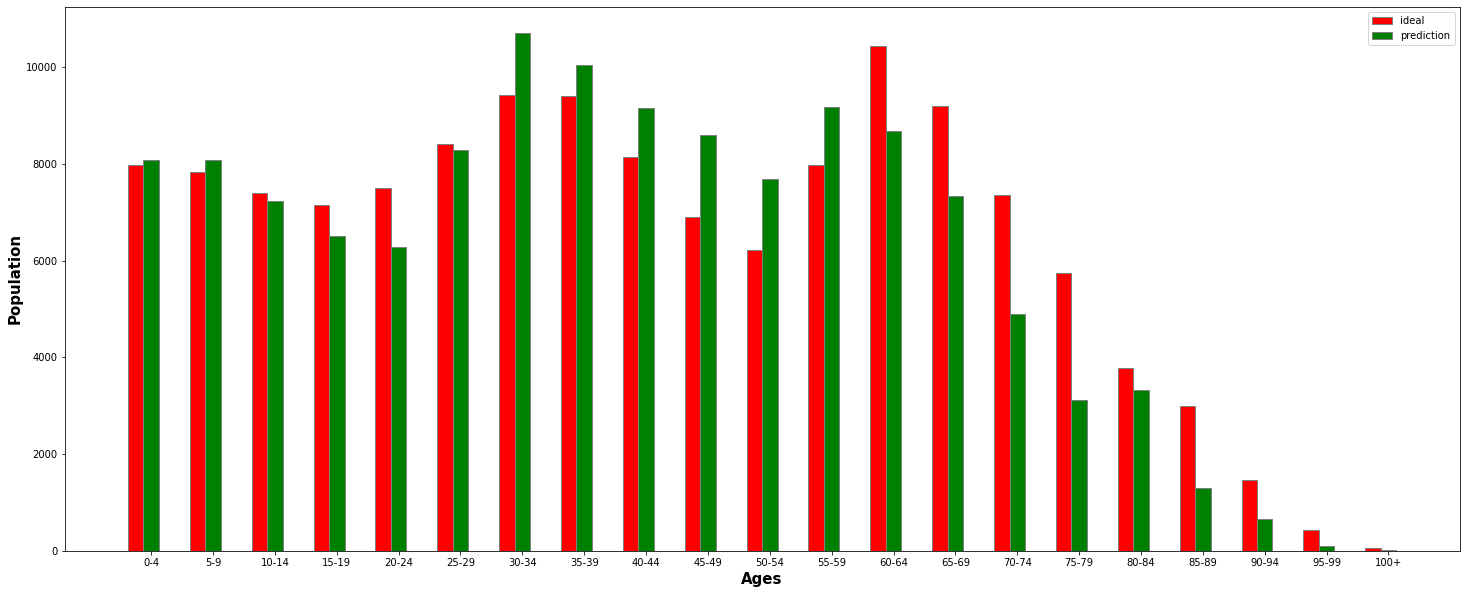

In [26]:
plt.figure(figsize=(25, 10))
barWidth = 0.25
br1 = np.arange(len(ideal))
br2 = [x + barWidth for x in br1]
plt.bar(br1, ideal, color ='r', width = barWidth,
        edgecolor ='grey', label ='ideal')
plt.bar(br2, prediction, color ='g', width = barWidth,
        edgecolor ='grey', label ='prediction')
plt.xlabel('Ages', fontweight ='bold', fontsize = 15)
plt.ylabel('Population', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(ideal))],
           names[1:])
plt.legend()
plt.savefig('population_ex.png', bbox_inches='tight')
plt.show()

In [45]:
ideal_sum = []
total_sum = []
for year in range(2021, 2051):
    ideal_sum.append(ideal_df[ideal_df['year'] == year].iloc[:, 1:].sum(axis=1))
    total_sum.append(total[total['year'] == year].iloc[:, 1:].sum(axis=1))

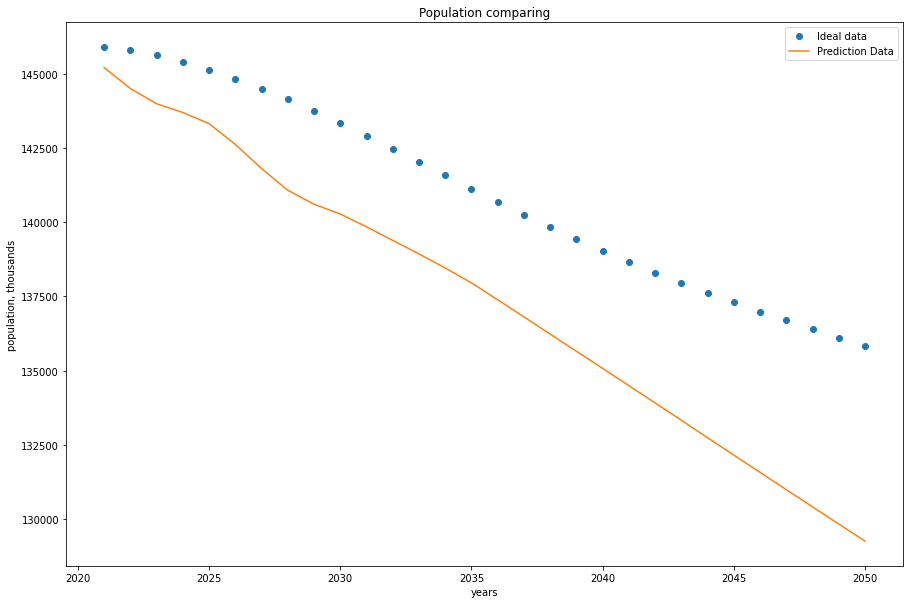

In [46]:
plt.figure(figsize=(15, 10))
plt.plot(range(2021, 2051), ideal_sum, 'o', label="Ideal data")
plt.plot(range(2021, 2051), total_sum, label="Prediction Data")
plt.title('Population comparing')
plt.legend()
plt.xlabel('years')
plt.ylabel('population, thousands')
plt.savefig('./population_linear', bbox_inches='tight')
plt.show()